In [5]:
#import neccessary libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

In [6]:
df=pd.read_csv("kidneyStones.csv")
df.head(n=10)

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
5,5,1.025,6.90,947,28.4,395,2.64,1
6,6,1.008,5.09,371,15.5,159,2.17,1
7,7,1.015,5.53,450,8.1,170,1.16,0
8,8,1.025,7.38,736,25.3,418,1.52,0
9,9,1.017,6.61,527,20.0,75,4.49,1


In [7]:
df.drop('id', axis=1, inplace=True)

In [8]:
df.shape

(414, 7)

In [9]:
df.describe().T.style.set_properties(**{'font-size': '14px',
                                       'border-radius': '1px'
                                       })

,count,mean,std,min,25%,50%,75%,max
gravity,414.000000,1.017894,0.006675,1.005000,1.012000,1.018000,1.022000,1.040000
ph,414.000000,5.955459,0.642260,4.760000,5.530000,5.740000,6.280000,7.940000
osmo,414.000000,651.545894,234.676567,187.000000,455.250000,679.500000,840.000000,1236.000000
cond,414.000000,21.437923,7.514750,5.100000,15.500000,22.200000,27.600000,38.000000
urea,414.000000,278.657005,136.442249,10.000000,170.000000,277.000000,385.000000,620.000000
calc,414.000000,4.114638,3.217641,0.170000,1.450000,3.130000,6.630000,14.340000
target,414.000000,0.444444,0.497505,0.000000,0.000000,0.000000,1.000000,1.000000


AxesSubplot(0.125,0.11;0.775x0.77)


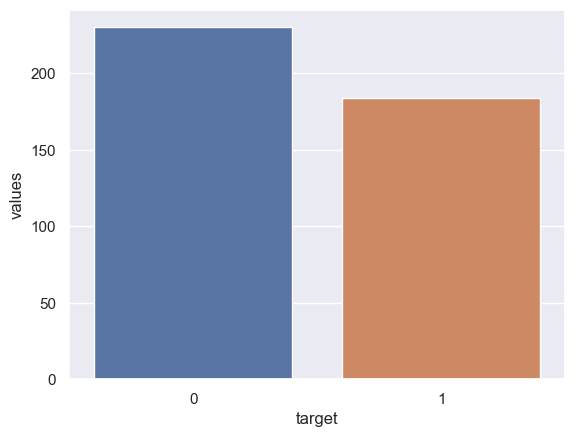

In [10]:
import matplotlib.pyplot as plt #visualization

#checking label imbalance

temp=df['target'].value_counts()
temp_df=pd.DataFrame({'target':temp.index, 'values':temp.values})
print(sns.barplot(x='target', y='values',data=temp_df))

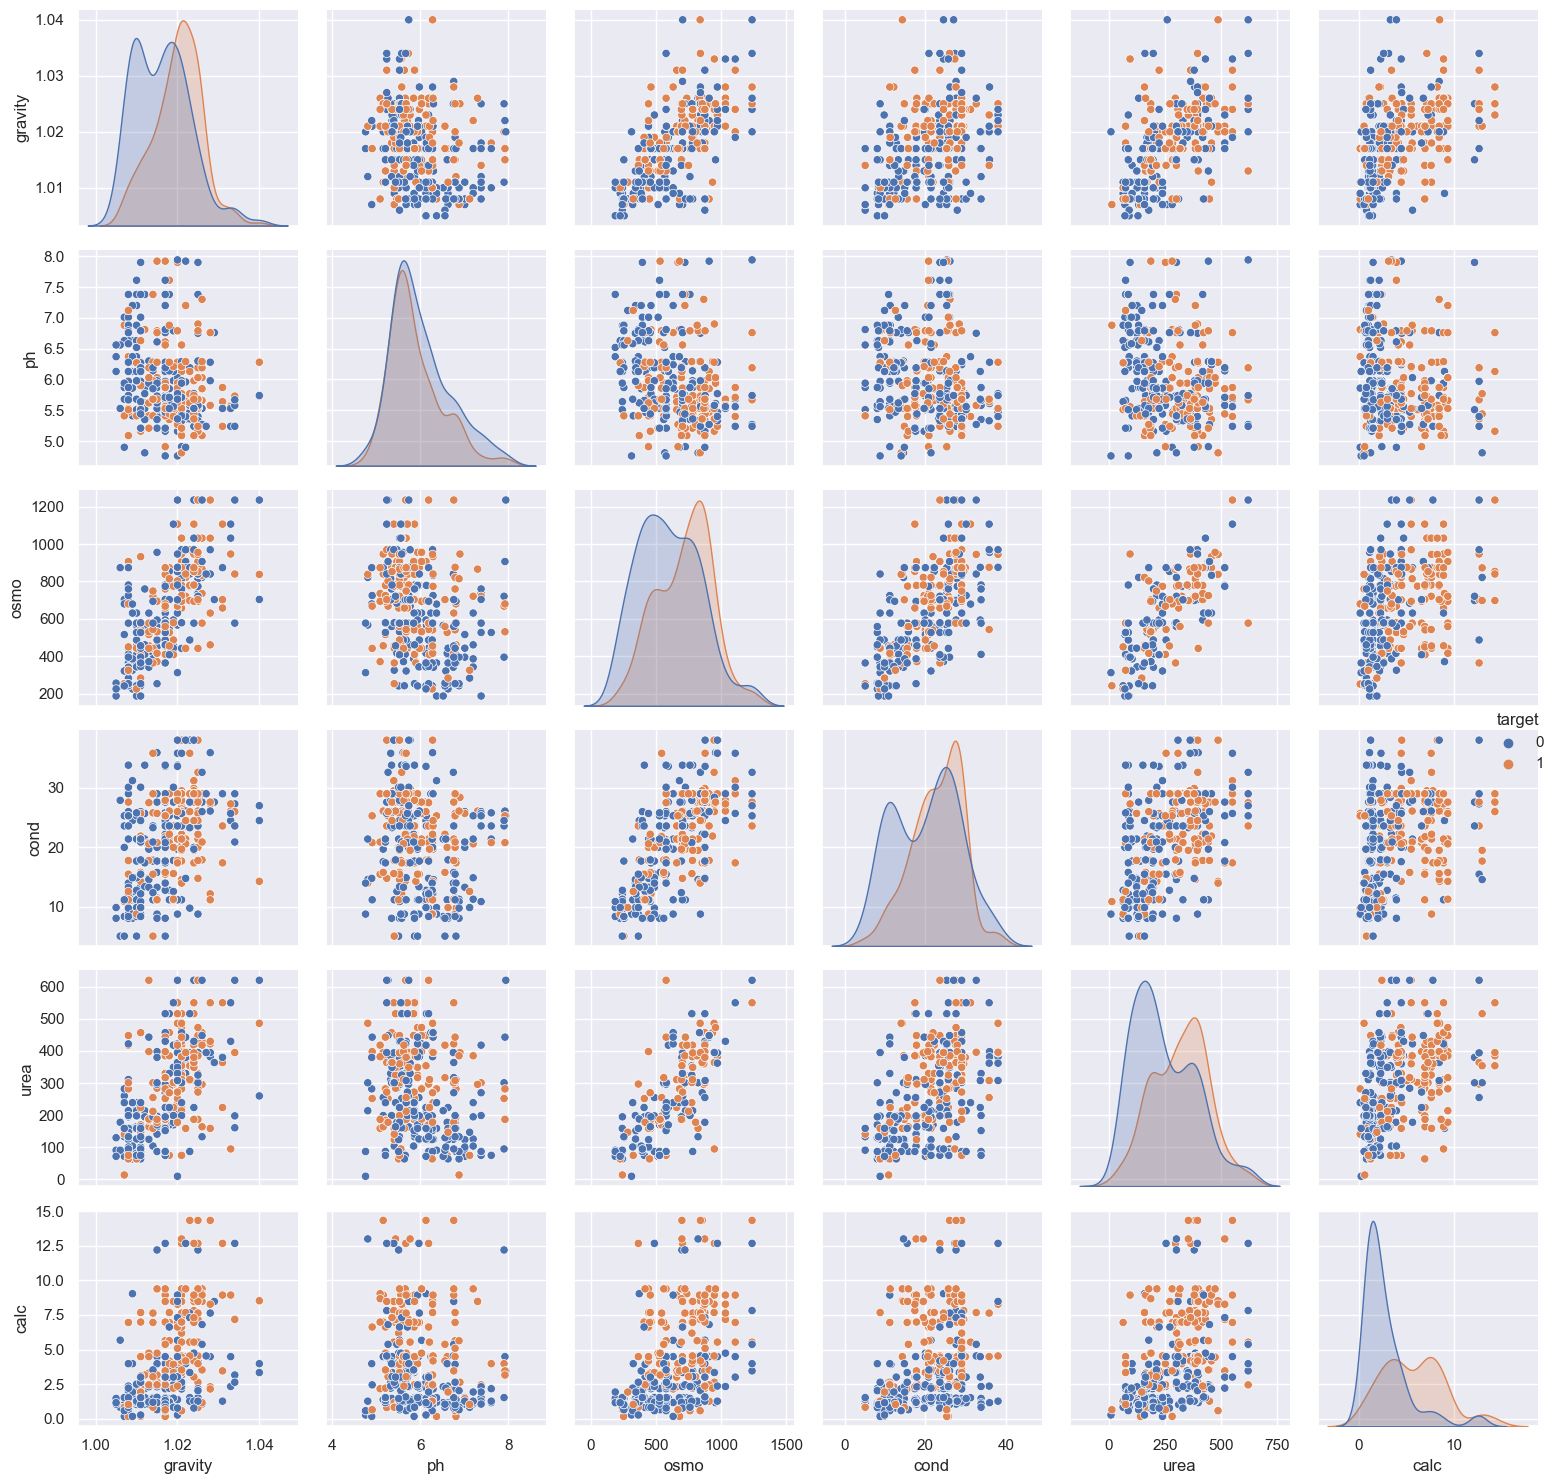

In [11]:
#visualizing all tests of all observed specimen
sns.pairplot(df, hue='target')
plt.tight_layout()

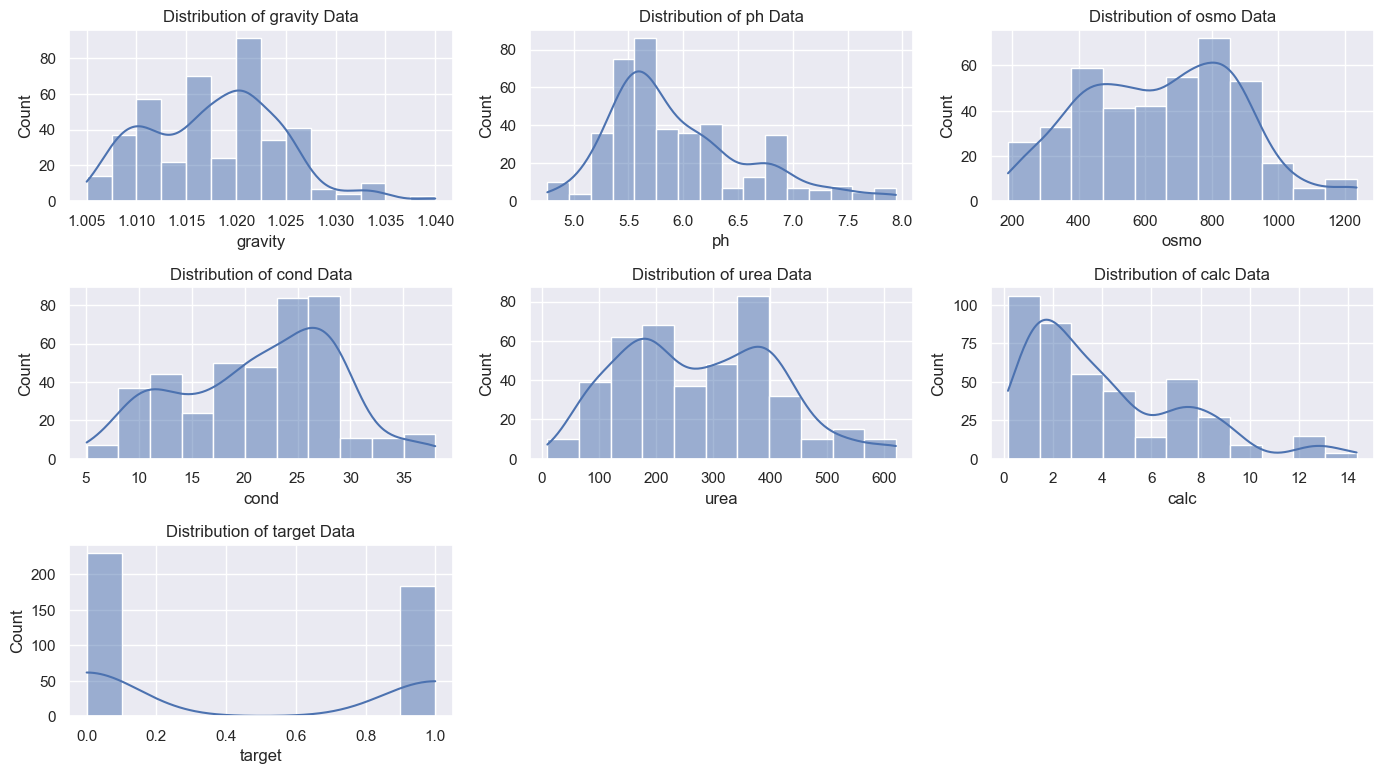

In [12]:
plt.figure(figsize=(14,10))
plt.title("Distribution of feature Data in the Dataset")
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
plt.show()

In [13]:
features = df.columns
features=list(features)

features

['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']

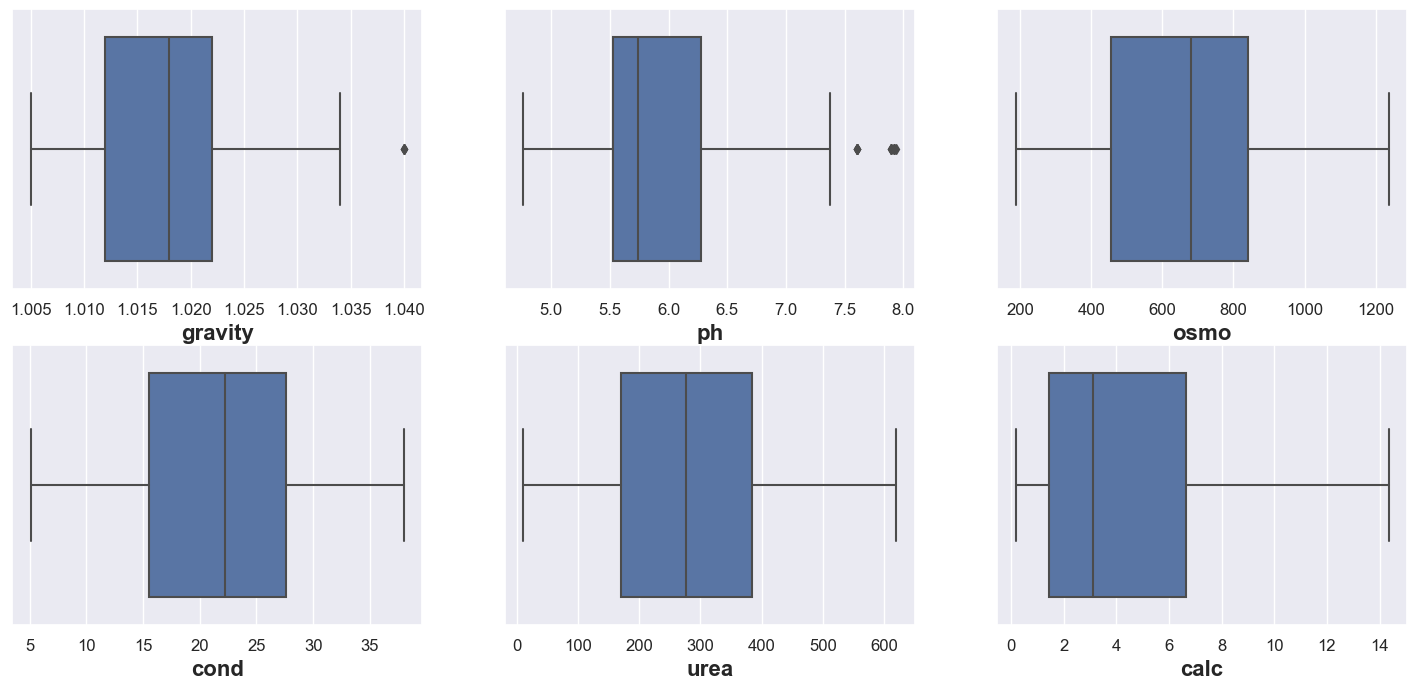

In [14]:
ncols = 3
nrows = 2

fig, axes =plt.subplots(nrows, ncols, figsize=(18, 8))
for r in range(nrows):
    for c in range(ncols):
        col=features[r*ncols+c]
        sns.boxplot(x=df[col], ax=axes[r, c])
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=16, fontweight='bold')
        axes[r, c].tick_params(labelsize=12, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(12)
        axes[r, c].yaxis.offsetText.set_fontsize(12)
    
plt.show()

In [15]:
#checkimg for correlation between variables
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


In [16]:
#feature engineering
df['ion_product'] =  df['urea']*df['cond']
df['calc_to_urea_ratio'] = df['calc'] / df['urea']
df['Electrolyte_balance'] = df['cond'] / (10 **(-df['ph']))
df['osmo_to_sg_ratio'] = df['osmo'] / df['gravity']
df['osmo_density'] = df['osmo'] * df['gravity']

In [17]:
features.extend(['ion_product','calc_to_urea_ratio','Electrolyte_balance','osmo_to_sg_ratio','osmo_density'])
features

['gravity',
 'ph',
 'osmo',
 'cond',
 'urea',
 'calc',
 'target',
 'ion_product',
 'calc_to_urea_ratio',
 'Electrolyte_balance',
 'osmo_to_sg_ratio',
 'osmo_density']

In [18]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target,ion_product,calc_to_urea_ratio,Electrolyte_balance,osmo_to_sg_ratio,osmo_density
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,4.140000e+02,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444,6484.342029,0.015876,8.648060e+07,639.076188,664.286341
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505,4372.547941,0.012198,2.854768e+08,227.658735,241.948291
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000,88.000000,0.000603,5.063871e+05,184.965381,187.935000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000,2496.875000,0.007832,7.145826e+06,447.717555,461.016000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000,6014.400000,0.013333,1.335426e+07,668.633235,684.935500
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000,9782.425000,0.019943,3.420087e+07,819.113212,860.580000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000,20212.000000,0.108750,2.203538e+09,1211.764706,1285.440000


<AxesSubplot:title={'center':'pearson moment correlation viz on features'}>

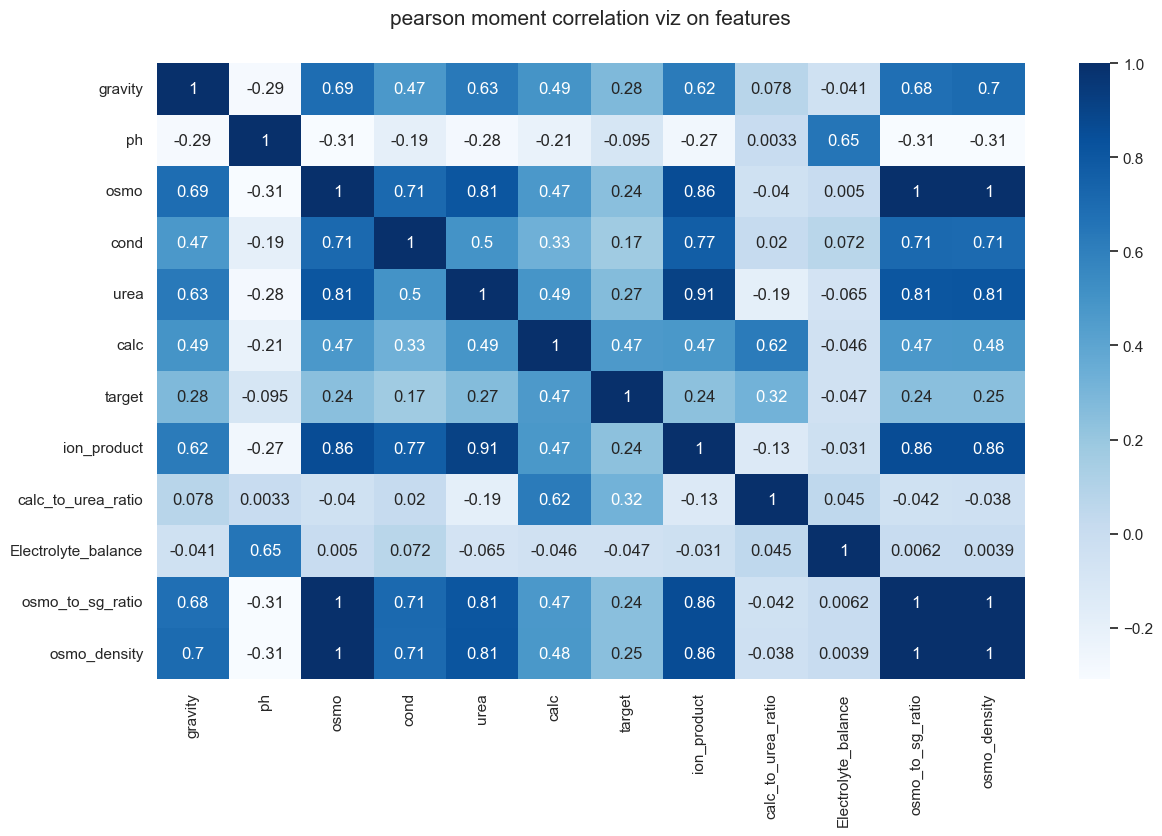

In [19]:
#checking for correlation
plt.figure(figsize=(14, 8))
plt.title("pearson moment correlation viz on features", y=1.05, size=15)
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [20]:
df.columns.values

array(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target',
       'ion_product', 'calc_to_urea_ratio', 'Electrolyte_balance',
       'osmo_to_sg_ratio', 'osmo_density'], dtype=object)

In [21]:
cols = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc',
       'ion_product', 'calc_to_urea_ratio', 'Electrolyte_balance',
       'osmo_to_sg_ratio', 'osmo_density', 'target']

In [22]:
df = df[cols]
df.head()

,gravity,ph,osmo,cond,urea,calc,ion_product,calc_to_urea_ratio,Electrolyte_balance,osmo_to_sg_ratio,osmo_density,target
0,1.013,6.19,443,14.8,124,1.45,1835.2,0.011694,2.292249e+07,437.314906,448.759,0
1,1.025,5.40,703,23.6,394,4.18,9298.4,0.010609,5.928052e+06,685.853659,720.575,0
2,1.009,6.13,371,24.5,159,9.04,3895.5,0.056855,3.304959e+07,367.690783,374.339,0
3,1.021,4.91,442,20.8,398,6.63,8278.4,0.016658,1.690687e+06,432.908913,451.282,1
4,1.021,5.53,874,17.8,385,2.21,6853.0,0.005740,6.031426e+06,856.023506,892.354,1


In [23]:
cols

['gravity',
 'ph',
 'osmo',
 'cond',
 'urea',
 'calc',
 'ion_product',
 'calc_to_urea_ratio',
 'Electrolyte_balance',
 'osmo_to_sg_ratio',
 'osmo_density',
 'target']

In [24]:
#seperate dependent and independent variable

x=df.drop(['target'],axis='columns')
y=df['target']

In [25]:
x.head(2)

,gravity,ph,osmo,cond,urea,calc,ion_product,calc_to_urea_ratio,Electrolyte_balance,osmo_to_sg_ratio,osmo_density
0,1.013,6.19,443,14.8,124,1.45,1835.2,0.011694,2.292249e+07,437.314906,448.759
1,1.025,5.40,703,23.6,394,4.18,9298.4,0.010609,5.928052e+06,685.853659,720.575


In [26]:
y.head(2)

0    0
1    0
Name: target, dtype: int64

In [27]:
#fix label imbalance

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros=RandomOverSampler()
c=Counter(y)
c

Counter({0: 230, 1: 184})

In [24]:
X_ROS, y_ROS = ros.fit_resample(x, y)
print(Counter(y_ROS))

Counter({0: 230, 1: 230})


In [25]:
#feature scaling
scaler=MinMaxScaler(feature_range=(0, 1))
x=scaler.fit_transform(X_ROS)
y=y_ROS


In [28]:
df.dtypes

gravity                float64
ph                     float64
osmo                     int64
cond                   float64
urea                     int64
calc                   float64
ion_product            float64
calc_to_urea_ratio     float64
Electrolyte_balance    float64
osmo_to_sg_ratio       float64
osmo_density           float64
target                   int64
dtype: object

In [29]:
#retaining 95% of variance by reducing the dimentionality

from sklearn.decomposition import PCA

pca=PCA(.9999)
X_PCA = pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

(414, 11)
(414, 1)


In [30]:
#spliting the data
from sklearn.model_selection import train_test_split

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2,random_state=2023)

In [31]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score

# build a decision tree classifier

clf = tree.DecisionTreeClassifier(random_state=2023)
# evaluate the model using 10-fold cross-validation
train_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
test_scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
print ("Train Fold AUC Scores: ", train_scores)
print ("Train CV AUC Score: ", train_scores.mean())
print ("\nTest Fold AUC Scores: ", test_scores)
print ("Test CV AUC Score: ", test_scores.mean())

Train Fold AUC Scores:  [0.50746269 0.51515152 0.56060606 0.46969697 0.57575758]
Train CV AUC Score:  0.5257349615558571

Test Fold AUC Scores:  [0.41176471 0.23529412 0.52941176 0.4375     0.1875    ]
Test CV AUC Score:  0.36029411764705876


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [33]:
input_size= 9

output_size=2

hidden_layer_size=1000

classifier=tf.keras.Sequential([
                        tf.keras.layers.Dense(hidden_layer_size, activation='relu', input_shape=(9, )),
                        tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                        tf.keras.layers.Dense(output_size, activation='sigmoid'),
                        tf.keras.layers.Input(shape=(input_size,))
                        ])

classifier.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

batch_size=100

max_epochs = 25

early_stopping = EarlyStopping(patience=50)



classifier.fit(X_train, y_train,
               batch_size=batch_size,
               epochs=max_epochs,
               callbacks=[early_stopping],
               validation_data=(X_test, y_test),
               verbose=2)

Epoch 1/25
4/4 - 2s - loss: 0.6609 - accuracy: 0.5408 - val_loss: 0.6040 - val_accuracy: 0.6848 - 2s/epoch - 565ms/step
Epoch 2/25
4/4 - 0s - loss: 0.5840 - accuracy: 0.7174 - val_loss: 0.5782 - val_accuracy: 0.7283 - 242ms/epoch - 61ms/step
Epoch 3/25
4/4 - 0s - loss: 0.5442 - accuracy: 0.7500 - val_loss: 0.5723 - val_accuracy: 0.7174 - 271ms/epoch - 68ms/step
Epoch 4/25
4/4 - 0s - loss: 0.5360 - accuracy: 0.7446 - val_loss: 0.5785 - val_accuracy: 0.6848 - 255ms/epoch - 64ms/step
Epoch 5/25
4/4 - 0s - loss: 0.5289 - accuracy: 0.7690 - val_loss: 0.5707 - val_accuracy: 0.7500 - 259ms/epoch - 65ms/step
Epoch 6/25
4/4 - 0s - loss: 0.5252 - accuracy: 0.7717 - val_loss: 0.5682 - val_accuracy: 0.7174 - 238ms/epoch - 59ms/step
Epoch 7/25
4/4 - 0s - loss: 0.5134 - accuracy: 0.7636 - val_loss: 0.5606 - val_accuracy: 0.7500 - 253ms/epoch - 63ms/step
Epoch 8/25
4/4 - 0s - loss: 0.5126 - accuracy: 0.7717 - val_loss: 0.5542 - val_accuracy: 0.7500 - 269ms/epoch - 67ms/step
Epoch 9/25
4/4 - 0s - loss

In [34]:
test_loss, test_accuracy = classifier.evaluate(X_train, y_train)

12/12 [==============================] - 0s 10ms/step - loss: 0.4104 - accuracy: 0.8288


In [35]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              10000     
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 2)                 2002      
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
Total params: 1,013,002
Trainable params: 1,013,002
Non-trainable params: 0
_________________________________________________________________


3/3 [==============================] - 0s 9ms/step


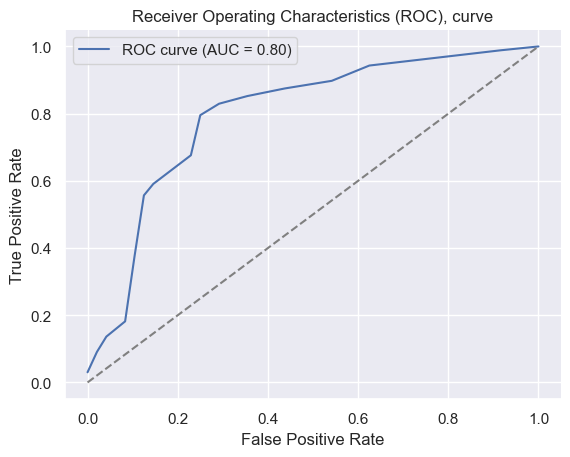

In [37]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score


# positive class of the test data
y_score= classifier.predict(X_test)[:, 1]

# True positive rate, False postive rate and treshold comoutations
fpr, tpr, thresholds=roc_curve(y_test,y_score)
roc_auc = auc(fpr, tpr)

sns.lineplot(fpr, tpr, ci=None, label='ROC curve (AUC = %0.2f)' % roc_auc)
sns.lineplot([0,1],[0,1], color='grey', linestyle='--')
sns.despine()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC), curve')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_score.round()))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        48
           1       0.75      0.82      0.78        44

    accuracy                           0.78        92
   macro avg       0.78      0.78      0.78        92
weighted avg       0.79      0.78      0.78        92



Text(0.5, 20.049999999999997, 'Predicted label')

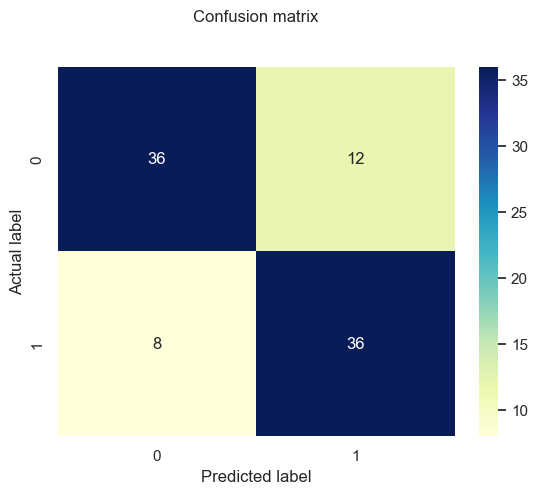

In [48]:
cm=confusion_matrix(y_test,y_score.round())
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')